In [49]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
msh=pd.read_csv('agaricuslepiotadata.csv')

In [56]:
msh.rename(columns={'p': 'poisonous', 'x': 'cap-shape', 's': 'cap-surface', 'n': 'cap-color', 't': 'bruises', 'p.1': 'odor',
                   'f': 'gill-attachment', 'c': 'gill-spacing', 'n.1': 'gill-size', 'k': 'gill-color', 'e': 'stalk-shape', 
                   'e.1': 'stalk-root', 's.1': 'stalk-surface-above-ring', 's.2': 'stalk-surface-below-ring', 
                   'w': 'stalk-color-above-ring', 'w.1': 'stalk-color-below-ring', 'p.2': 'veil-type', 'w.2': 'veil-color', 
                   'o': 'ring-number', 'p.3': 'ring-type', 'k.1': 'spore-print-color', 's.3': 'population', 
                   'u': 'habitat'}, inplace=True)

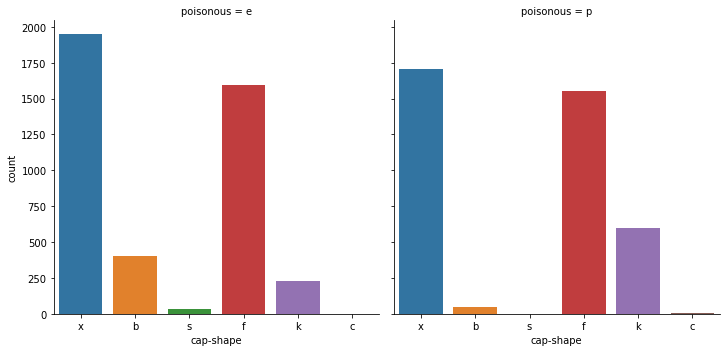

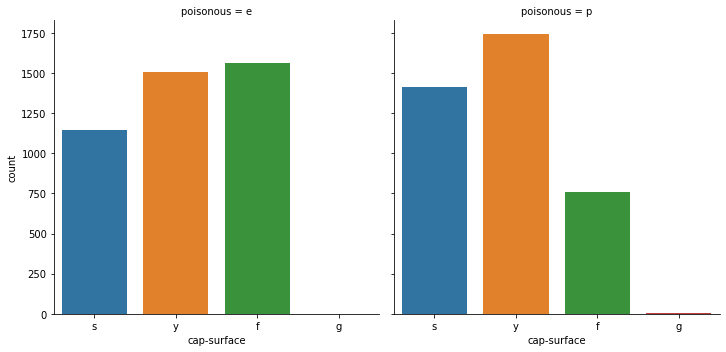

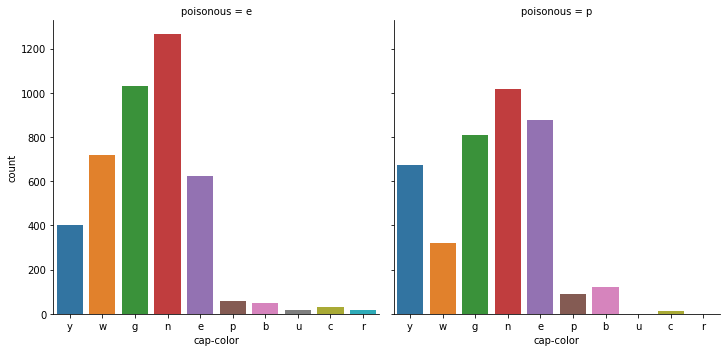

In [13]:
sns.catplot(x="cap-shape", data=msh, col="poisonous", kind="count")
sns.catplot(x="cap-surface", data=msh, col="poisonous", kind="count")
sns.catplot(x="cap-color", data=msh, col="poisonous", kind="count")

In [25]:
msh=pd.get_dummies(msh)
msh

,poisonous_e,poisonous_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8119,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8120,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8121,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [26]:
msh.head()

,poisonous_e,poisonous_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
x=msh.iloc[:,2:]
x.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [28]:
y=msh.iloc[:,0]

In [29]:
y.tail()

8118    1
8119    1
8120    1
8121    0
8122    1
Name: poisonous_e, dtype: uint8

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)


In [34]:
import warnings
warnings.filterwarnings('ignore')
lr=LogisticRegression()
cvs=cross_val_score(lr,x_train,y_train,cv=5,scoring='f1')
print(cvs)

[1. 1. 1. 1. 1.]


In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test) 

print('Accuracy:' , accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9625279642058165
[[845   0]
 [ 67 876]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       845
           1       1.00      0.93      0.96       943

    accuracy                           0.96      1788
   macro avg       0.96      0.96      0.96      1788
weighted avg       0.97      0.96      0.96      1788



In [50]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[845   0]
 [  0 943]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       943

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [52]:
y_test

1971    0
4661    1
5444    0
6526    0
5876    0
       ..
3128    1
2264    1
7356    0
4552    0
2215    1
Name: poisonous_e, Length: 1788, dtype: uint8

In [53]:
preddtc

array([0, 1, 0, ..., 0, 0, 1], dtype=uint8)